### 문제 정의 (목표 설정)
- 8천여개의 버섯 데이터를 활용해서 독버섯 / 식용버섯인지 분류 해보자.
- 결정 트리모델을 시각화 해보자.
- 정답을 맞추는 부분에서 많은 역할을 하는 특성을 확인해보자. 

In [1]:
# 필요한 라이브러리 import 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 데이터 수집 (데이터 로드)
- 제공된 mushroom.csv 파일 읽어오기

In [2]:
data=pd.read_csv('./data/mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# info() 데이터의 간략한 정보를 확인하는 함수 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# 기술 통계 확인 
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 데이터 전처리
- 결측치 없었다. - 학습용 데이터이기 때문에 이미 정제된 데이터 제공
- 전처리 Pass!

### 탐색적 데이터 분석 (EDA)

In [5]:
# 신규 라이브러리 등장! 
# matplotlib 라이브러리는 시각화의 기본! 
# seaborn 라이브러리를 이용해서 깔끔한 그래프를 그려보고 기능을 추가해보자! 
import seaborn as sns

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

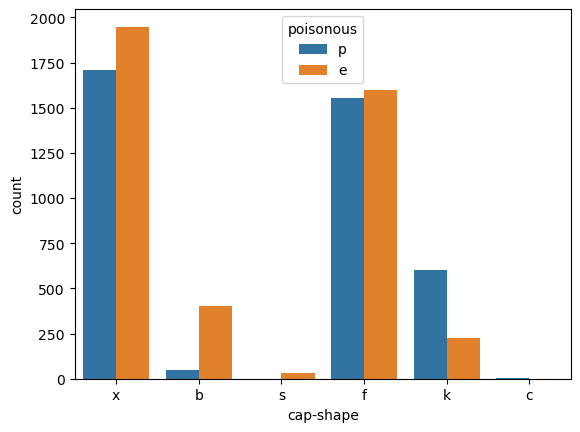

In [6]:
# countplt : 막대그래프 / matplotlib => plt.bar
sns.countplot(data=data, # 데이터 프레임 넣어주는 곳
             x='cap-shape', # x축에 데이터를 넣어주는 곳
             hue='poisonous' # 해당하는 컬럼의 값들 개수가 bar 차트로 출력되게 만드는 부분 + 범례
             )

- 갓 표면이 s, y 인 데이터는 못먹는 버섯이 많다. 
- 갓 표면이 f 인 데이터는 먹을 수 있는 버섯이 많다. 
- 갓 표면이 g 인 데이터는 먹으면 큰일난다. 독버섯 
- cap-surfae 특성에선 f 값을 가지고 데이터를 판단하면 독성과 식용을 잘 구분하겠구나. 

### 5 모델링
- 데이터 분리, 모델 선택, 하이퍼 파라미터 뉴닝, 학습, 평가, 시각화 

In [7]:
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [8]:
# 데이터 분리
# 1-1. 문제와 정답 분리 
X=data.iloc[:,1:]
y=data.iloc[:,0]
#데이터 확인 
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [9]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [10]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [11]:
# 머신러닝 모델도 알파벳을 인식할까?
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree_test=DecisionTreeClassifier()

In [14]:
tree_test.fit(X,y)

ValueError: could not convert string to float: 'x'

- 머신러닝 모델은 기본적으로 숫자값을 입력받길 기대한다. 
- 숫자가 아닌 데이터를 이용할 시 에러가 발생한다. 
- 알파벳 범주형을 숫자값으로 변경해주는 작업이 필요하다. (인코딩) 
- 인코딩에는 두가지의 방법이 있다. (라벨인코딩, 원핫인코딩)

** 라벨 인코딩 / 레이블 인코딩 **
- 특성의 유니크한 값의 개수에 따라 숫자를 1씩 증가시켜 mapping 하는 방법 
- 회귀 파트처럼 연속된 숫자를 다루는 알고리즘에서는 1,2,3... 같이 커지는 숫자가 숫자에 따른 순서나 중요도로 인식될 가능성이 높아서 잘못된 결과가 나올 수 있음 
- 분류에서만 쓸 수 있다. 

In [15]:
X['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [16]:
X['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [17]:
# 레이블 인코딩 before 
X['cap-shape']

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [18]:
# 레이블 인코딩 after
X['cap-shape'].map({'x':0, 'b':1, 's':2, 'f':3, 'k':4, 'c':5})

0       0
1       0
2       1
3       0
4       0
       ..
8119    4
8120    0
8121    3
8122    4
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [19]:
# 레이블 인코딩을 쉽게 하기위한 레이블 인코더 import 
from sklearn.preprocessing import LabelEncoder

In [20]:
# 인코더 객체 생성
encoder=LabelEncoder()
# 레이블 인코더로 학습시키기 (cat-shape 의 unique 값들을 기계한테 인식)
encoder.fit(X['cap-shape'])
# 학습된 인코더의 문자를 숫자로 변환 
labels=encoder.transform(X['cap-shape'])
labels

array([5, 5, 0, ..., 2, 3, 5])

**원핫 인코딩 **
- 모든 데이터를 0/1 로 변환을 시킴
- 데이터를 변환시킬 때 데이터 내부의 고유값 만큼 컬럼을 생성하고 해당하는 데이터라면 1, 그 외의 데이터는 0
- 컴퓨터는 2진법으로 모든 데이터를 처리한다. 그래서 원핫인코딩을 사용하면 기계가 직관적으로 이해하기 편하다. 

In [21]:
# pd.get_dummies() : 데이터를 원핫 인코딩 시켜주는 함수 
X_one_hot=pd.get_dummies(X)
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


- 쓰앵님! 문제는 인코딩이 끝났습니다. 근데 정답은요? 
- 정답은 기계가 학습할 필요가 없다. 비교만 하면 된다. 그래서 인코딩이 필요없다. 

In [22]:
# 데이터 분할 
from sklearn.model_selection import train_test_split

In [23]:
# 순서 외우기 
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,y,
                                                   test_size=0.3,
                                                  random_state=10)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 117)
(2438, 117)
(5686,)
(2438,)


In [25]:
# 모델 객체 생성
tree_model=DecisionTreeClassifier() # 기본 모델 

In [26]:
# 모델 학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# 모델 정확도 평가 (train 셋) - score 함수 이용 
tree_model.score(X_train, y_train)

1.0

In [28]:
# 모델 정확도 평가 (test 셋) - score 함수 이용 
tree_model.score(X_test, y_test)

1.0

### 트리모델 내부 시각화 해보기
- tree 의 모양을 보기위해 외부 라이브러리인 graphviz 설치 

- anaconda prompt => pip install graphviz / conda install grapviz 실행 
- c 드라이브 > 사용자 > pc 이름 > anaconda3 > Library > include 에서 graphviz 복사 
- c 드라이브 > 사용자 > pc 이름 > anaconda3 > Lib > site-pakages 붙여넣기 

In [29]:
# 모델 시각화 진행하기 
from sklearn.tree import export_graphviz

In [30]:
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [31]:
# 파일 내보내기 
export_graphviz(tree_model, # 시각화 시켜줄 모델의 이름 
               out_file='tree.dot', # 파일명 및 저장 경로 설정 
               feature_names=X_one_hot.columns, # 원핫인코딩 된 컬럼명 기입 
               class_names=['독', '식용'], # 클래스(label) 이름 설정 
               impurity=True, # 지니불순도 표시
               filled=True # 노드가 클래스로 구분되도록 색상을 채워주기
               )

In [32]:
import graphviz

In [33]:
# tree.dot 이라는 파일을 불러올 때 UTF8 로 인코딩 해오고 이거 f 라고 줄여부를거야 
with open('tree.dot', encoding='UTF-8') as f:
    dot_graph=f.read()

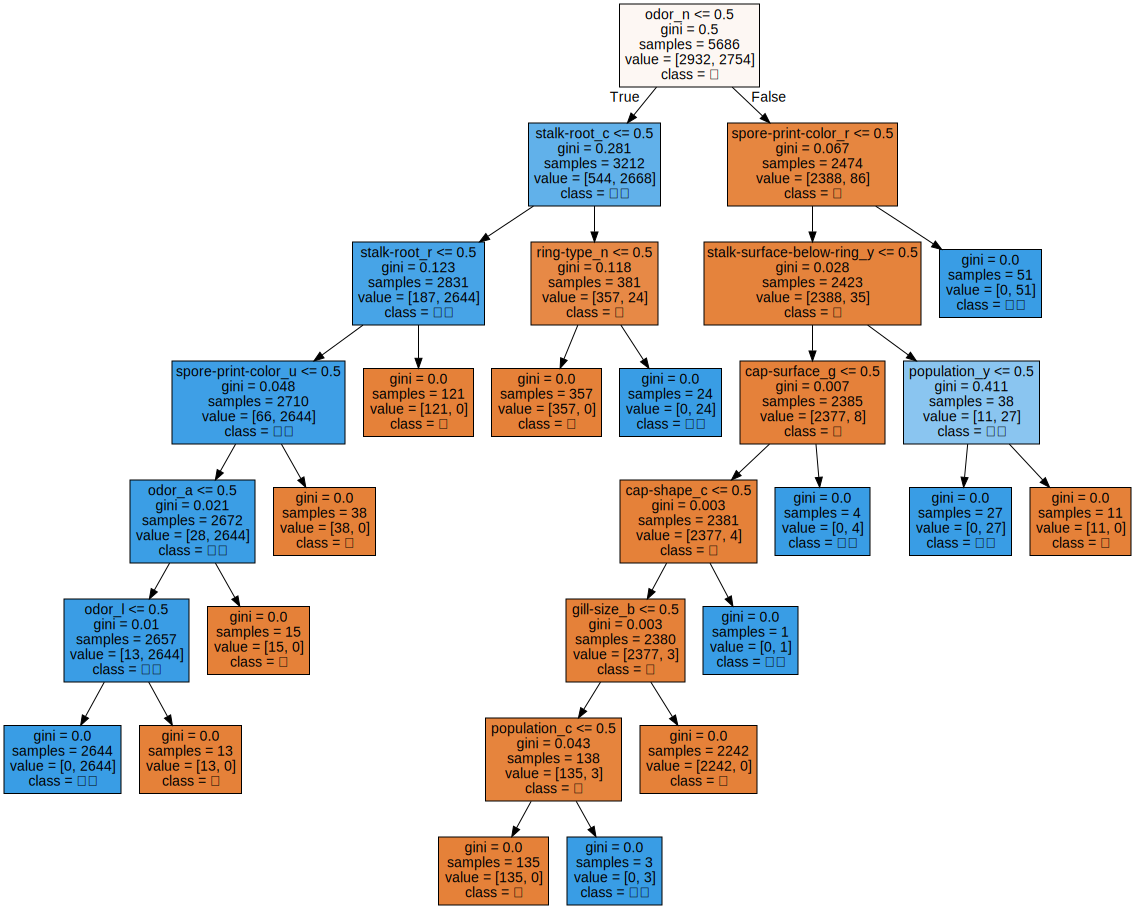

In [34]:
display(graphviz.Source(dot_graph))
# <= 0.5 : 해당 컬럼명의 원핫 인코딩된 데이터가 0 / 1 인지 판단하는 조건
# gini : 지니 불순도
# samplts : 전체 데이터의 갯수
# value : 클래스별 개수[독 / 식용]
# class : 어떤 데이터가 많이 있는가 

- 의사 결정 나무 모델은 완벽주의적 성격이 강하다. 
- 사전 가지치기를 하지 않으면 완벽하게 나눌때까지 멈추지 않는다. 
- 모델이 복잡해질 가능성이 높고 과대적합에 빠질 위험이 크다. 
- 그럼 사전가지치기 진행해보고 모델에 모양을 살펴보자

### 하이퍼 파라미터 튜닝 (사전 가지치기 진행)

In [35]:
# 모델 객체 생성(max_depth = 3, max_leaf_nodes = 7, min_samples_leaf = 30)
tree_model2=DecisionTreeClassifier(max_depth = 3, 
                                   max_leaf_nodes = 7, 
                                   min_samples_leaf = 30)

In [36]:
# 모델 학습
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7, min_samples_leaf=30)

In [37]:
# 모델 정확도 평가 (train 셋) - score 함수 이용 
tree_model2.score(X_train, y_train)

0.9808301090397468

In [38]:
# 모델 정확도 평가 (test 셋) - score 함수 이용 
tree_model2.score(X_test, y_test)

0.9807219031993437

In [39]:
# 파일 내보내기 
export_graphviz(tree_model2, # 시각화 시켜줄 모델의 이름 
               out_file='tree2.dot', # 파일명 및 저장 경로 설정 
               feature_names=X_one_hot.columns, # 원핫인코딩 된 컬럼명 기입 
               class_names=['독', '식용'], # 클래스(label) 이름 설정 
               impurity=True, # 지니불순도 표시
               filled=True # 노드가 클래스로 구분되도록 색상을 채워주기
               )

In [40]:
# tree.dot 이라는 파일을 불러올 때 UTF8 로 인코딩 해오고 이거 f 라고 줄여부를거야 
with open('tree2.dot', encoding='UTF-8') as f:
    dot_graph2=f.read()

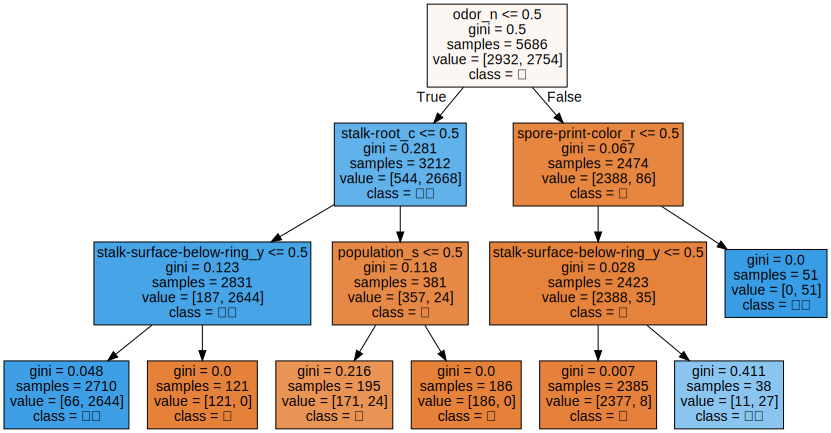

In [41]:
display(graphviz.Source(dot_graph2))

### 특성 선택 확인해보기 (feature selection)
- 지도 학습 모델에서는 데이터의 각 특성들의 중요도를 출력할 수 있음 (정답 관여율이 얼마나 되는가?)
- 각 특성들은 0 ~ 1 사이의 실수값을 가진다. (중요도 값) / 모든 특성 중요도의 합은 1이 나온다
- 0 이 나오는 컬럼은 모델이 정답을 예측하는데 전혀 도움이 되지 않는다. 
- 모델이 정답을 예측하는데 도움이 많이 되는 특성일수록 1에 가깝게 나온다. 
- 만약 특성 중요도가 1인 컬럼이 있다 => 이 특성 하나만으로 정답을 정확하게 예측할 수 있다. 

In [42]:
fi=tree_model.feature_importances_
fi

array([0.00000000e+00, 7.02103219e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.80252522e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.04007607e-02, 0.00000000e+00,
       0.00000000e+00, 9.10945096e-03, 0.00000000e+00, 6.23355113e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.32614456e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.79373456e-01, 0.00000000e+00, 7.76386661e-02,
      

In [43]:
# 특성 중요도를 데이터 프레임화 시켜보자 
fi_df=pd.DataFrame(fi, index=X_one_hot.columns, columns=['특성 중요도'])
fi_df

,특성 중요도
cap-shape_b,0.000000
cap-shape_c,0.000702
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [44]:
# 지금은 데이터가 뒤죽박죽이다. 특성 중요도를 기준으로 내림차순정렬을 해보자. 
fi_df.sort_values(by='특성 중요도', ascending=False, inplace=True)

In [45]:
fi_df

,특성 중요도
odor_n,0.623355
stalk-root_c,0.179373
stalk-root_r,0.077639
spore-print-color_r,0.034164
spore-print-color_u,0.025833
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000
gill-spacing_w,0.000000


- tree 모델 내부 시각화 표를 보면 특성 중요도가 높은 odor_n 이 가장 먼저 나오는걸 확인할 수 있다. 
- 정답 관여율, 중요도가 높은 컬럼을 우선적으로 고려해야 효율적으로 데이터를 분류할 수 있기 때문이다. 
- 현재 버섯 데이터는 odor_n 이라는 컬럼이 60% 이상의 중요도를 혼자 차지하고 있다. 모델이 학습하는데 용이하고 높은 정확도를 손쉽게 얻을 수 있다. 

### 교차 검증
- 모델의 일반화 성능 기대값을 확인해보는 방법
- 주의) 실제로 모델을 학습하는 방법이 아님. 모델의 기대 성능값을 살펴보는 도구다. 

In [46]:
# 교차검증 import 하기 
from sklearn.model_selection import cross_val_score

In [47]:
tree_model3=DecisionTreeClassifier(max_depth = 3, 
                                   max_leaf_nodes = 7, 
                                   min_samples_leaf = 30)

In [48]:
# cross_val_score(모델 이름, 문제 데이터, 정답 데이터, cv=분할할 값)
rs=cross_val_score(tree_model3, X_one_hot, y, cv=5)
rs

array([1.        , 0.99015385, 0.78953846, 1.        , 0.62561576])

In [49]:
rs.mean()

0.8810616142478211